In [1]:

#import libraries
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import re
from datetime import datetime
from timeit import Timer
import time
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read the twitter archive file
twitter_df = pd.read_csv('twitter-archive-enhanced.csv')
twitter_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [3]:
#import the tweet image using requests library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)
    
#read the image predictions file
image = pd.read_csv('image-predictions.tsv', sep = '\t')

In [4]:

# get your consumer key, consumer secret ,access token and access secret from twitter to get WeRAteDogs dataset
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''


In [5]:
# Variables created for tweepy query
auth = tweepy.OAuthHandler(consumer_key,consumer_secret) 
auth.set_access_token(access_token,access_secret)
api = tweepy.API(auth)

In [6]:
# Using the tweet IDs in the Twitter archive, query the Twitter API for each tweet's JSON

start = time.time() # start timer

with open('status_error.txt', 'w') as errfile: 
    valid_ids = 0
    err_ids = 0
    tweet_ids = twitter_df.tweet_id
    with open('tweet_json.txt', 'w', encoding='utf-8') as outfile:
        for i, tweet_id in tweet_ids.iteritems():
            try:
                print("%s# %s" % (str(i+1), tweet_id))
                # Get tweet data using Twitter API
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                json_content = tweet._json
                
                # Write each tweet's JSON data to its own line in a file
                json.dump(json_content, outfile)
                outfile.write('\n')
                valid_ids += 1
            except tweepy.TweepError as e:
                err_ids += 1
                err_str = []
                err_str.append(str(tweet_id))
                err_str.append(': ')
                err_str.append(e.response.json()['errors'][0]['message'])
                err_str.append('\n')
                errfile.write(''.join(err_str))
                print(''.join(err_str))
                continue
        print("%s %s" % ('Valid tweets:', valid_ids))
        print("%s %s" % ('Error tweets:', err_ids))
        
end = time.time() # end timer
print((end - start)/(1000*60))

1# 892420643555336193
2# 892177421306343426
3# 891815181378084864
4# 891689557279858688
5# 891327558926688256
6# 891087950875897856
7# 890971913173991426
8# 890729181411237888
9# 890609185150312448
10# 890240255349198849
11# 890006608113172480
12# 889880896479866881
13# 889665388333682689
14# 889638837579907072
15# 889531135344209921
16# 889278841981685760
17# 888917238123831296
18# 888804989199671297
19# 888554962724278272
20# 888202515573088257
888202515573088257: No status found with that ID.

21# 888078434458587136
22# 887705289381826560
23# 887517139158093824
24# 887473957103951883
25# 887343217045368832
26# 887101392804085760
27# 886983233522544640
28# 886736880519319552
29# 886680336477933568
30# 886366144734445568
31# 886267009285017600
32# 886258384151887873
33# 886054160059072513
34# 885984800019947520
35# 885528943205470208
36# 885518971528720385
37# 885311592912609280
38# 885167619883638784
39# 884925521741709313
40# 884876753390489601
41# 884562892145688576
42# 88444180538

320# 834477809192075265
321# 834458053273591808
322# 834209720923721728
323# 834167344700198914
324# 834089966724603904
325# 834086379323871233
326# 833863086058651648
327# 833826103416520705
328# 833732339549220864
329# 833722901757046785
330# 833479644947025920
331# 833124694597443584
332# 832998151111966721
333# 832769181346996225
334# 832757312314028032
335# 832682457690300417
336# 832645525019123713
337# 832636094638288896
338# 832397543355072512
339# 832369877331693569
340# 832273440279240704
341# 832215909146226688
342# 832215726631055365
343# 832088576586297345
344# 832040443403784192
345# 832032802820481025
346# 831939777352105988
347# 831926988323639298
348# 831911600680497154
349# 831670449226514432
350# 831650051525054464
351# 831552930092285952
352# 831322785565769729
353# 831315979191906304
354# 831309418084069378
355# 831262627380748289
356# 830956169170665475
357# 830583320585068544
358# 830173239259324417
359# 830097400375152640
360# 829878982036299777
361# 82986139616

653# 792394556390137856
654# 792050063153438720
655# 791821351946420224
656# 791784077045166082
657# 791780927877898241
658# 791774931465953280
659# 791672322847637504
660# 791406955684368384
661# 791312159183634433
662# 791026214425268224
663# 790987426131050500
664# 790946055508652032
665# 790723298204217344
666# 790698755171364864
667# 790581949425475584
668# 790337589677002753
669# 790277117346975746
670# 790227638568808452
671# 789986466051088384
672# 789960241177853952
673# 789903600034189313
674# 789628658055020548
675# 789599242079838210
676# 789530877013393408
677# 789314372632018944
678# 789280767834746880
679# 789268448748703744
680# 789137962068021249
681# 788908386943430656
682# 788765914992902144
683# 788552643979468800
684# 788412144018661376
685# 788178268662984705
686# 788150585577050112
687# 788070120937619456
688# 788039637453406209
689# 787810552592695296
690# 787717603741622272
691# 787397959788929025
692# 787322443945877504
693# 787111942498508800
694# 78696306437

753420520834629632: Rate limit exceeded

936# 753398408988139520
753398408988139520: Rate limit exceeded

937# 753375668877008896
753375668877008896: Rate limit exceeded

938# 753298634498793472
753298634498793472: Rate limit exceeded

939# 753294487569522689
753294487569522689: Rate limit exceeded

940# 753039830821511168
753039830821511168: Rate limit exceeded

941# 753026973505581056
753026973505581056: Rate limit exceeded

942# 752932432744185856
752932432744185856: Rate limit exceeded

943# 752917284578922496
752917284578922496: Rate limit exceeded

944# 752701944171524096
752701944171524096: Rate limit exceeded

945# 752682090207055872
752682090207055872: Rate limit exceeded

946# 752660715232722944
752660715232722944: Rate limit exceeded

947# 752568224206688256
752568224206688256: Rate limit exceeded

948# 752519690950500352
752519690950500352: Rate limit exceeded

949# 752334515931054080
752334515931054080: Rate limit exceeded

950# 752309394570878976
752309394570878976: Rate 

741303864243200000: Rate limit exceeded

1063# 741099773336379392
741099773336379392: Rate limit exceeded

1064# 741067306818797568
741067306818797568: Rate limit exceeded

1065# 740995100998766593
740995100998766593: Rate limit exceeded

1066# 740711788199743490
740711788199743490: Rate limit exceeded

1067# 740699697422163968
740699697422163968: Rate limit exceeded

1068# 740676976021798912
740676976021798912: Rate limit exceeded

1069# 740373189193256964
740373189193256964: Rate limit exceeded

1070# 740365076218183684
740365076218183684: Rate limit exceeded

1071# 740359016048689152
740359016048689152: Rate limit exceeded

1072# 740214038584557568
740214038584557568: Rate limit exceeded

1073# 739979191639244800
739979191639244800: Rate limit exceeded

1074# 739932936087216128
739932936087216128: Rate limit exceeded

1075# 739844404073074688
739844404073074688: Rate limit exceeded

1076# 739623569819336705
739623569819336705: Rate limit exceeded

1077# 739606147276148736
7396061472

718540630683709445: Rate limit exceeded

1188# 718460005985447936
718460005985447936: Rate limit exceeded

1189# 718454725339934721
718454725339934721: Rate limit exceeded

1190# 718246886998687744
718246886998687744: Rate limit exceeded

1191# 718234618122661888
718234618122661888: Rate limit exceeded

1192# 717841801130979328
717841801130979328: Rate limit exceeded

1193# 717790033953034240
717790033953034240: Rate limit exceeded

1194# 717537687239008257
717537687239008257: Rate limit exceeded

1195# 717428917016076293
717428917016076293: Rate limit exceeded

1196# 717421804990701568
717421804990701568: Rate limit exceeded

1197# 717047459982213120
717047459982213120: Rate limit exceeded

1198# 717009362452090881
717009362452090881: Rate limit exceeded

1199# 716802964044845056
716802964044845056: Rate limit exceeded

1200# 716791146589110272
716791146589110272: Rate limit exceeded

1201# 716730379797970944
716730379797970944: Rate limit exceeded

1202# 716447146686459905
7164471466

707014260413456384: Rate limit exceeded

1314# 706904523814649856
706904523814649856: Rate limit exceeded

1315# 706901761596989440
706901761596989440: Rate limit exceeded

1316# 706681918348251136
706681918348251136: Rate limit exceeded

1317# 706644897839910912
706644897839910912: Rate limit exceeded

1318# 706593038911545345
706593038911545345: Rate limit exceeded

1319# 706538006853918722
706538006853918722: Rate limit exceeded

1320# 706516534877929472
706516534877929472: Rate limit exceeded

1321# 706346369204748288
706346369204748288: Rate limit exceeded

1322# 706310011488698368
706310011488698368: Rate limit exceeded

1323# 706291001778950144
706291001778950144: Rate limit exceeded

1324# 706265994973601792
706265994973601792: Rate limit exceeded

1325# 706169069255446529
706169069255446529: Rate limit exceeded

1326# 706166467411222528
706166467411222528: Rate limit exceeded

1327# 706153300320784384
706153300320784384: Rate limit exceeded

1328# 705975130514706432
7059751305

696900204696625153: Rate limit exceeded

1440# 696894894812565505
696894894812565505: Rate limit exceeded

1441# 696886256886657024
696886256886657024: Rate limit exceeded

1442# 696877980375769088
696877980375769088: Rate limit exceeded

1443# 696754882863349760
696754882863349760: Rate limit exceeded

1444# 696744641916489729
696744641916489729: Rate limit exceeded

1445# 696713835009417216
696713835009417216: Rate limit exceeded

1446# 696518437233913856
696518437233913856: Rate limit exceeded

1447# 696490539101908992
696490539101908992: Rate limit exceeded

1448# 696488710901260288
696488710901260288: Rate limit exceeded

1449# 696405997980676096
696405997980676096: Rate limit exceeded

1450# 696100768806522880
696100768806522880: Rate limit exceeded

1451# 695816827381944320
695816827381944320: Rate limit exceeded

1452# 695794761660297217
695794761660297217: Rate limit exceeded

1453# 695767669421768709
695767669421768709: Rate limit exceeded

1454# 695629776980148225
6956297769

688116655151435777: Rate limit exceeded

1566# 688064179421470721
688064179421470721: Rate limit exceeded

1567# 687841446767013888
687841446767013888: Rate limit exceeded

1568# 687826841265172480
687826841265172480: Rate limit exceeded

1569# 687818504314159109
687818504314159109: Rate limit exceeded

1570# 687807801670897665
687807801670897665: Rate limit exceeded

1571# 687732144991551489
687732144991551489: Rate limit exceeded

1572# 687704180304273409
687704180304273409: Rate limit exceeded

1573# 687664829264453632
687664829264453632: Rate limit exceeded

1574# 687494652870668288
687494652870668288: Rate limit exceeded

1575# 687480748861947905
687480748861947905: Rate limit exceeded

1576# 687476254459715584
687476254459715584: Rate limit exceeded

1577# 687460506001633280
687460506001633280: Rate limit exceeded

1578# 687399393394311168
687399393394311168: Rate limit exceeded

1579# 687317306314240000
687317306314240000: Rate limit exceeded

1580# 687312378585812992
6873123785

681339448655802368: Rate limit exceeded

1692# 681320187870711809
681320187870711809: Rate limit exceeded

1693# 681302363064414209
681302363064414209: Rate limit exceeded

1694# 681297372102656000
681297372102656000: Rate limit exceeded

1695# 681281657291280384
681281657291280384: Rate limit exceeded

1696# 681261549936340994
681261549936340994: Rate limit exceeded

1697# 681242418453299201
681242418453299201: Rate limit exceeded

1698# 681231109724700672
681231109724700672: Rate limit exceeded

1699# 681193455364796417
681193455364796417: Rate limit exceeded

1700# 680970795137544192
680970795137544192: Rate limit exceeded

1701# 680959110691590145
680959110691590145: Rate limit exceeded

1702# 680940246314430465
680940246314430465: Rate limit exceeded

1703# 680934982542561280
680934982542561280: Rate limit exceeded

1704# 680913438424612864
680913438424612864: Rate limit exceeded

1705# 680889648562991104
680889648562991104: Rate limit exceeded

1706# 680836378243002368
6808363782

676613908052996102: Rate limit exceeded

1817# 676606785097199616
676606785097199616: Rate limit exceeded

1818# 676603393314578432
676603393314578432: Rate limit exceeded

1819# 676593408224403456
676593408224403456: Rate limit exceeded

1820# 676590572941893632
676590572941893632: Rate limit exceeded

1821# 676588346097852417
676588346097852417: Rate limit exceeded

1822# 676582956622721024
676582956622721024: Rate limit exceeded

1823# 676575501977128964
676575501977128964: Rate limit exceeded

1824# 676533798876651520
676533798876651520: Rate limit exceeded

1825# 676496375194980353
676496375194980353: Rate limit exceeded

1826# 676470639084101634
676470639084101634: Rate limit exceeded

1827# 676440007570247681
676440007570247681: Rate limit exceeded

1828# 676430933382295552
676430933382295552: Rate limit exceeded

1829# 676263575653122048
676263575653122048: Rate limit exceeded

1830# 676237365392908289
676237365392908289: Rate limit exceeded

1831# 676219687039057920
6762196870

673716320723169284: Rate limit exceeded

1942# 673715861853720576
673715861853720576: Rate limit exceeded

1943# 673711475735838725
673711475735838725: Rate limit exceeded

1944# 673709992831262724
673709992831262724: Rate limit exceeded

1945# 673708611235921920
673708611235921920: Rate limit exceeded

1946# 673707060090052608
673707060090052608: Rate limit exceeded

1947# 673705679337693185
673705679337693185: Rate limit exceeded

1948# 673700254269775872
673700254269775872: Rate limit exceeded

1949# 673697980713705472
673697980713705472: Rate limit exceeded

1950# 673689733134946305
673689733134946305: Rate limit exceeded

1951# 673688752737402881
673688752737402881: Rate limit exceeded

1952# 673686845050527744
673686845050527744: Rate limit exceeded

1953# 673680198160809984
673680198160809984: Rate limit exceeded

1954# 673662677122719744
673662677122719744: Rate limit exceeded

1955# 673656262056419329
673656262056419329: Rate limit exceeded

1956# 673636718965334016
6736367189

671151324042559489: Rate limit exceeded

2067# 671147085991960577
671147085991960577: Rate limit exceeded

2068# 671141549288370177
671141549288370177: Rate limit exceeded

2069# 671138694582165504
671138694582165504: Rate limit exceeded

2070# 671134062904504320
671134062904504320: Rate limit exceeded

2071# 671122204919246848
671122204919246848: Rate limit exceeded

2072# 671115716440031232
671115716440031232: Rate limit exceeded

2073# 671109016219725825
671109016219725825: Rate limit exceeded

2074# 670995969505435648
670995969505435648: Rate limit exceeded

2075# 670842764863651840
670842764863651840: Rate limit exceeded

2076# 670840546554966016
670840546554966016: Rate limit exceeded

2077# 670838202509447168
670838202509447168: Rate limit exceeded

2078# 670833812859932673
670833812859932673: Rate limit exceeded

2079# 670832455012716544
670832455012716544: Rate limit exceeded

2080# 670826280409919488
670826280409919488: Rate limit exceeded

2081# 670823764196741120
6708237641

668955713004314625: Rate limit exceeded

2193# 668932921458302977
668932921458302977: Rate limit exceeded

2194# 668902994700836864
668902994700836864: Rate limit exceeded

2195# 668892474547511297
668892474547511297: Rate limit exceeded

2196# 668872652652679168
668872652652679168: Rate limit exceeded

2197# 668852170888998912
668852170888998912: Rate limit exceeded

2198# 668826086256599040
668826086256599040: Rate limit exceeded

2199# 668815180734689280
668815180734689280: Rate limit exceeded

2200# 668779399630725120
668779399630725120: Rate limit exceeded

2201# 668655139528511488
668655139528511488: Rate limit exceeded

2202# 668645506898350081
668645506898350081: Rate limit exceeded

2203# 668643542311546881
668643542311546881: Rate limit exceeded

2204# 668641109086707712
668641109086707712: Rate limit exceeded

2205# 668636665813057536
668636665813057536: Rate limit exceeded

2206# 668633411083464705
668633411083464705: Rate limit exceeded

2207# 668631377374486528
6686313773

666644823164719104: Rate limit exceeded

2319# 666454714377183233
666454714377183233: Rate limit exceeded

2320# 666447344410484738
666447344410484738: Rate limit exceeded

2321# 666437273139982337
666437273139982337: Rate limit exceeded

2322# 666435652385423360
666435652385423360: Rate limit exceeded

2323# 666430724426358785
666430724426358785: Rate limit exceeded

2324# 666428276349472768
666428276349472768: Rate limit exceeded

2325# 666421158376562688
666421158376562688: Rate limit exceeded

2326# 666418789513326592
666418789513326592: Rate limit exceeded

2327# 666411507551481857
666411507551481857: Rate limit exceeded

2328# 666407126856765440
666407126856765440: Rate limit exceeded

2329# 666396247373291520
666396247373291520: Rate limit exceeded

2330# 666373753744588802
666373753744588802: Rate limit exceeded

2331# 666362758909284353
666362758909284353: Rate limit exceeded

2332# 666353288456101888
666353288456101888: Rate limit exceeded

2333# 666345417576210432
6663454175

In [7]:
# List of dictionaries to read tweet's JSON data line by line and later convert to a DataFrame
df_list = []
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        status = json.loads(line)
        
        # Append to list of dictionaries
        df_list.append({'tweet_id': status['id'],
                        'retweet_count': status['retweet_count'],
                        'favorite_count': status['favorite_count'],
                        'display_text_range': status['display_text_range']
                       })

# Create a DataFrame with tweet ID, retweet count, favorite count and display_text_range
json_tweets = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'display_text_range'])

## Assess


##### Look at twitter dataset 

In [8]:
twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
# Check for duplicated tweets
twitter_df.tweet_id.duplicated().sum()

0

In [11]:
#check the number of sources in twitter archive
twitter_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [12]:
# Check for retweets
twitter_df[twitter_df.retweeted_status_id.notnull()].retweeted_status_id.count()

181

In [13]:
# Check answers to tweets
twitter_df[twitter_df.in_reply_to_status_id.notnull()].in_reply_to_status_id.count()

78

In [14]:
# See individual value count in name column
twitter_df.name.value_counts() 

None           745
a               55
Charlie         12
Oliver          11
Lucy            11
Cooper          11
Penny           10
Lola            10
Tucker          10
Bo               9
Winston          9
the              8
Sadie            8
Daisy            7
Bailey           7
an               7
Buddy            7
Toby             7
Jax              6
Koda             6
Dave             6
Stanley          6
Bella            6
Rusty            6
Oscar            6
Scout            6
Jack             6
Leo              6
Milo             6
very             5
              ... 
Mark             1
Mitch            1
Margo            1
Duchess          1
Rilo             1
Cermet           1
Poppy            1
Hector           1
Brockly          1
Buddah           1
Zooey            1
Brian            1
infuriating      1
Willem           1
Tango            1
Frönq            1
Amy              1
Ralphie          1
Kramer           1
Berkeley         1
Crawford         1
Chef        

In [15]:
#sort names
twitter_df.name.sort_values()

1035            Abby
1021            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
144            Albus
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
2238           Alfie
661            Alfie
367            Alfie
1616           Alfie
858            Alfie
51              Alfy
201            Alice
1701           Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
            ...     
852               my
988              not
335              not
1747      officially
1206             old
993              one
1936             one
924              one
369              one
2326           quite
169            quite
118            quite
193            quite
2030           space
22              such
2345             the
2346         

In [16]:
# Check values on the column doggo
twitter_df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [17]:
# Check values on the column floofer
twitter_df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [18]:
# Check values on the column pupper
twitter_df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [19]:
# Check values on the column puppo
twitter_df.puppo.value_counts()


None     2326
puppo      30
Name: puppo, dtype: int64

##### Look at Json


In [20]:
#display the json tweets data frame
json_tweets

,tweet_id,retweet_count,favorite_count,display_text_range
0,892420643555336193,8159,37466,"[0, 85]"
1,892177421306343426,6040,32201,"[0, 138]"
2,891815181378084864,3997,24274,"[0, 121]"
3,891689557279858688,8305,40787,"[0, 79]"
4,891327558926688256,9007,39003,"[0, 138]"
5,891087950875897856,2985,19607,"[0, 138]"
6,890971913173991426,1984,11444,"[0, 140]"
7,890729181411237888,18126,63187,"[0, 118]"
8,890609185150312448,4103,26965,"[0, 122]"
9,890240255349198849,7092,30900,"[0, 133]"


In [21]:
#display info for json_tweets
json_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 4 columns):
tweet_id              881 non-null int64
retweet_count         881 non-null int64
favorite_count        881 non-null int64
display_text_range    881 non-null object
dtypes: int64(3), object(1)
memory usage: 27.6+ KB


In [22]:
#display head for json_tweets
json_tweets.head()

,tweet_id,retweet_count,favorite_count,display_text_range
0,892420643555336193,8159,37466,"[0, 85]"
1,892177421306343426,6040,32201,"[0, 138]"
2,891815181378084864,3997,24274,"[0, 121]"
3,891689557279858688,8305,40787,"[0, 79]"
4,891327558926688256,9007,39003,"[0, 138]"


In [23]:
#display statistics for json_tweets
json_tweets.describe()

,tweet_id,retweet_count,favorite_count
count,8.810000e+02,881.000000,881.000000
mean,8.199348e+17,5020.241771,14299.942111
std,3.697073e+16,5664.609394,15038.634294
min,7.588287e+17,1.000000,0.000000
25%,7.892808e+17,2077.000000,5421.000000
50%,8.183075e+17,3429.000000,10938.000000
75%,8.482121e+17,5862.000000,20074.000000
max,8.924206e+17,59956.000000,138082.000000


##### image dataset

In [24]:
#display info for image predictions data frame
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
#display statistics for images predictions
image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [26]:
# Check dataset content
image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [27]:
# Check the number of images with multiple breed predictions
image[~image.p1_dog & ~image.p2_dog & ~image.p3_dog].tweet_id.count()


324

In [28]:
#check the number of images
image.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [29]:
#check for duplicate tweet_ids in the image dataframe
sum(image.tweet_id.duplicated())

0

In [30]:
#Check for duplicate jpg_url
sum(image.jpg_url.duplicated())

66

In [31]:
image.duplicated().sum()

0

## Quality

#### twitter_df dataset
    - There are 181 retweets.
    - There are 78 response tweets.
    - Timestamp column is a string instead of Datetime.
    - Missing dog names (replaced with 'None').
    - Incorrect dog names.
    - json_tweets has column name id. 
    - rating_numerator & rating_denominator with wrong data type.
    


    

##### image
    -For columns p1, p2 & p3. The breed names are lower case.
    -Breeds named '_'.
    -Invalid data type for breed columns.
    -There are 66 duplicate jpg_urls.


## Tidiness

     - Join all 3 dataframes.
     - Dog stages should be a single column rather than four
     

## Clean

In [32]:
#Keeping the original dataset. Making a copy of the datasets.
twitter_clean = twitter_df.copy()
image_clean = image.copy()
json_clean = json_tweets.copy()




##### Quality 
    twitter_df: there are 181 retweets. 

##### Define
    Delete all retweet rows.

##### Code

In [33]:
twitter_clean.drop(twitter_clean.index[twitter_clean.retweeted_status_id.notnull()], inplace=True)

##### Test

In [34]:
twitter_clean[twitter_clean.retweeted_status_id.notnull()].retweeted_status_id.count()


0

##### Quality
twitter_df: There are 78 response tweets.



##### Define
    Delete all rows that are response tweets.




##### Code

In [35]:
twitter_clean.drop(twitter_clean.index[twitter_clean.in_reply_to_status_id.notnull()], inplace=True)

##### Test

In [36]:
twitter_clean[twitter_clean.in_reply_to_status_id.notnull()].in_reply_to_status_id.count()


0

##### Quality
       twitter_df: Timestamp column is a string instead of Datetime.

##### Define
    Convert timestamp from object to datetime.

##### Code


In [37]:
twitter_clean.timestamp = twitter_clean.timestamp.str[:-6].astype('datetime64[ns]')


##### Test

In [38]:
twitter_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](1), float

##### Quality
    twitter_df: Missing dog names (replaced with 'None')
    
##### Define
    Remove the lines that have dog name as 'None'.



##### Code

In [39]:
twitter_clean = twitter_clean[twitter_clean.name != "None"]


##### Test

In [40]:
sum(twitter_clean.name == "None")


0

##### Quality
    twitter_df: Incorrect dog names

##### Define

    Remove the lines that have incorrect dog names.

##### Code

In [41]:
lowercase = []

for word in twitter_clean['name']:
    if word.islower():
         lowercase.append(word)
            
Counter(lowercase)

Counter({'such': 1,
         'a': 55,
         'quite': 3,
         'not': 2,
         'one': 4,
         'incredibly': 1,
         'very': 4,
         'my': 1,
         'his': 1,
         'an': 6,
         'actually': 2,
         'just': 3,
         'getting': 2,
         'mad': 1,
         'this': 1,
         'unacceptable': 1,
         'all': 1,
         'old': 1,
         'infuriating': 1,
         'the': 8,
         'by': 1,
         'officially': 1,
         'life': 1,
         'light': 1,
         'space': 1})

In [42]:
twitter_clean = twitter_clean[twitter_clean.name.map(lambda word: word.istitle())]


##### Test

In [43]:
#check if any lowercase letter names left
lowercase2 = []

for word in twitter_clean['name']:
    if word.islower():
         lowercase2.append(word)
            
Counter(lowercase2)

Counter()

##### Quality
    json_tweets: Has Invalid column name id.
##### Define
    rename id column of tweet_json to tweet_id¶


##### Code

In [44]:
json_clean = json_clean.rename(columns = {'id':'tweet_id'})

##### Test

In [45]:
json_clean.head()


,tweet_id,retweet_count,favorite_count,display_text_range
0,892420643555336193,8159,37466,"[0, 85]"
1,892177421306343426,6040,32201,"[0, 138]"
2,891815181378084864,3997,24274,"[0, 121]"
3,891689557279858688,8305,40787,"[0, 79]"
4,891327558926688256,9007,39003,"[0, 138]"


##### Quality
    rating_numerator & rating_denominator with wrong data type.

##### Define
    Change the type to Float.

##### Code

In [47]:
rating = twitter_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']
twitter_clean['rating_numerator'] = rating['rating_numerator'].astype(float)
twitter_clean['rating_denominator'] = rating['rating_denominator'].astype(float)

##### Test

In [48]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1384 entries, 0 to 2325
Data columns (total 17 columns):
tweet_id                      1384 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1384 non-null datetime64[ns]
source                        1384 non-null object
text                          1384 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1384 non-null object
rating_numerator              1384 non-null float64
rating_denominator            1384 non-null float64
name                          1384 non-null object
doggo                         1384 non-null object
floofer                       1384 non-null object
pupper                        1384 non-null object
puppo                         1384 non-null object
dtypes: datetime64[ns](1), f

##### Quality
    image: For columns p1, p2 & p3. The breed names are lower case.

##### Define
    Make the first letter uppercase.

##### Code

In [49]:
image_clean.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [50]:
image_clean['p1'] = image_clean.p1.str.title()
image_clean['p2'] = image_clean.p2.str.title()
image_clean['p3'] = image_clean.p3.str.title()

##### Test

In [51]:
image_clean.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


###### Quality
    image: Breed named as '_'.

###### Define
    Replace '_' with space in breed column.

##### Code

In [52]:

image_clean.p1 = image_clean.p1.str.replace('_', ' ')
image_clean.p2 = image_clean.p2.str.replace('_', ' ')
image_clean.p3 = image_clean.p3.str.replace('_', ' ')

##### Test

In [53]:
image_clean.p1.str.contains('_').value_counts()

False    2075
Name: p1, dtype: int64

In [54]:
image_clean.p2.str.contains('_').value_counts()

False    2075
Name: p2, dtype: int64

In [55]:
image_clean.p3.str.contains('_').value_counts()

False    2075
Name: p3, dtype: int64

##### Quality
    image: Invalid data type for breed columns.

##### Define
    Convert breed columns from object to categorical.

##### Code

In [56]:
image_clean.p1 = image_clean.p1.astype('category')
image_clean.p2 = image_clean.p2.astype('category')
image_clean.p3 = image_clean.p3.astype('category')

##### Test

In [57]:
image_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null category
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null category
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null category
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), category(3), float64(3), int64(2), object(1)
memory usage: 174.9+ KB


##### Quality
    image: Duplicated jpg_urls.

##### Define
    drop duplicate jpg_url.

##### Code

In [58]:
image_clean.jpg_url.drop_duplicates(inplace=True)


##### Test

In [59]:
sum(image_clean.jpg_url.duplicated())

0

In [60]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null category
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null category
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null category
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), category(3), float64(3), int64(2), object(1)
memory usage: 174.4+ KB


## Tidiness

##### Quality
    Dog stages is split into four different columns.
##### Define
    Create dog stages with a single variable.

##### Code

In [61]:
twitter_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None


twitter_clean = pd.melt(twitter_clean, id_vars = ['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'], var_name = 'dog', value_name = 'dog_stage')


In [62]:
# Replace the NULL and NaN rows:
twitter_clean.doggo.replace('None', '', inplace=True)
twitter_clean.doggo.replace(np.NaN, '', inplace=True)
twitter_clean.floofer.replace('None', '', inplace=True)
twitter_clean.floofer.replace(np.NaN, '', inplace=True)
twitter_clean.pupper.replace('None', '', inplace=True)
twitter_clean.pupper.replace(np.NaN, '', inplace=True)
twitter_clean.puppo.replace('None', '', inplace=True)
twitter_clean.puppo.replace(np.NaN, '', inplace=True)

In [63]:
twitter_clean['stage'] = twitter_clean.doggo + twitter_clean.floofer + twitter_clean.pupper + twitter_clean.puppo
twitter_clean.loc[twitter_clean.stage == 'doggopupper', 'stage'] = 'doggo,pupper'
twitter_clean.loc[twitter_clean.stage == 'doggopuppo', 'stage'] = 'doggo,puppo'
twitter_clean.loc[twitter_clean.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

In [64]:

twitter_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,,,,,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,,,,,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,,,,,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,,,,,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,,,,,


##### Test

In [65]:
twitter_clean.stage.value_counts()

                1200
pupper           121
doggo             38
puppo             16
floofer            5
doggo,pupper       4
Name: stage, dtype: int64

In [66]:
#check the changes
twitter_clean.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,,,,,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,,,,,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,,,,,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,,,,,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,,,,,
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,,,,,
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,,,,,
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,,,,doggo
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,13.0,10.0,Koda,,,,,
11,889880896479866881,NaN,NaN,2017-07-25 16:11:53,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889880896...,13.0,10.0,Bruno,,,,,


##### Quality
    Join all 3 dataframes
##### Define
    join twitter_clean , image_clean and json_clean

In [67]:
# merge twitter_clean with image_clean
twitter_clean = pd.merge(left=twitter_clean, right=image_clean, left_on='tweet_id', right_on='tweet_id', how='inner')

In [68]:
#merge twitter_clean with json_clean
twitter_clean = pd.merge(left = twitter_clean, right = json_clean, left_on = 'tweet_id', right_on = 'tweet_id',how = 'inner')

##### Test

In [69]:
twitter_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 528 entries, 0 to 527
Data columns (total 32 columns):
tweet_id                      528 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     528 non-null datetime64[ns]
source                        528 non-null object
text                          528 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 528 non-null object
rating_numerator              528 non-null float64
rating_denominator            528 non-null float64
name                          528 non-null object
doggo                         528 non-null object
floofer                       528 non-null object
pupper                        528 non-null object
puppo                         528 non-null object
stage                         528 non-null

In [70]:
#store file
twitter_clean.to_csv('twitter_archive_master.csv',index = False , encoding = 'utf-8')

## Insights

In [71]:
twitter_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,5.280000e+02,0.0,0.0,0.0,0.0,528.000000,528.000000,528.000000,528.000000,528.000000,5.280000e+02,528.000000,528.000000
mean,8.202600e+17,NaN,NaN,NaN,NaN,12.004773,9.994318,1.340909,0.634526,0.138655,5.883834e-02,4536.215909,17303.909091
std,3.812947e+16,NaN,NaN,NaN,NaN,1.263886,0.130558,0.727133,0.256504,0.104174,5.317652e-02,4938.216146,13763.060333
min,7.588547e+17,NaN,NaN,NaN,NaN,3.000000,7.000000,1.000000,0.082489,0.000023,5.595040e-07,462.000000,2840.000000
25%,7.877873e+17,NaN,NaN,NaN,NaN,11.000000,10.000000,1.000000,0.421555,0.051587,1.199225e-02,2154.750000,8962.250000
50%,8.183980e+17,NaN,NaN,NaN,NaN,12.000000,10.000000,1.000000,0.656365,0.122895,4.496115e-02,3260.500000,13345.000000
75%,8.491420e+17,NaN,NaN,NaN,NaN,13.000000,10.000000,1.000000,0.875060,0.199749,9.411573e-02,5047.250000,21529.500000
max,8.924206e+17,NaN,NaN,NaN,NaN,24.000000,10.000000,4.000000,0.999953,0.467678,2.476190e-01,59956.000000,125050.000000


In [72]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528 entries, 0 to 527
Data columns (total 32 columns):
tweet_id                      528 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     528 non-null datetime64[ns]
source                        528 non-null object
text                          528 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 528 non-null object
rating_numerator              528 non-null float64
rating_denominator            528 non-null float64
name                          528 non-null object
doggo                         528 non-null object
floofer                       528 non-null object
pupper                        528 non-null object
puppo                         528 non-null object
stage                         528 non-null

In [73]:
twitter_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,display_text_range
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,Bagel,0.085851,False,Banana,0.076110,False,8159,37466,"[0, 85]"
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,Pekinese,0.090647,True,Papillon,0.068957,True,6040,32201,"[0, 138]"
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,Malamute,0.078253,True,Kelpie,0.031379,True,3997,24274,"[0, 121]"
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,8305,40787,"[0, 79]"
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,9007,39003,"[0, 138]"


In [74]:
#Find columns with missing values
twitter_clean.columns[twitter_clean.isnull().any()]

Index(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp'],
      dtype='object')

In [75]:
#drop missing values

columns_list = twitter_clean.columns[twitter_clean.isnull().any()]
twitter_clean.drop(columns_list, axis=1, inplace=True)

In [76]:
#Verify, if missing values are dropped.
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528 entries, 0 to 527
Data columns (total 27 columns):
tweet_id              528 non-null int64
timestamp             528 non-null datetime64[ns]
source                528 non-null object
text                  528 non-null object
expanded_urls         528 non-null object
rating_numerator      528 non-null float64
rating_denominator    528 non-null float64
name                  528 non-null object
doggo                 528 non-null object
floofer               528 non-null object
pupper                528 non-null object
puppo                 528 non-null object
stage                 528 non-null object
jpg_url               528 non-null object
img_num               528 non-null int64
p1                    528 non-null category
p1_conf               528 non-null float64
p1_dog                528 non-null bool
p2                    528 non-null category
p2_conf               528 non-null float64
p2_dog                528 non-null bool
p3 

## Descriptive statistics

In [77]:
twitter_clean.describe()


,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,5.280000e+02,528.000000,528.000000,528.000000,528.000000,528.000000,5.280000e+02,528.000000,528.000000
mean,8.202600e+17,12.004773,9.994318,1.340909,0.634526,0.138655,5.883834e-02,4536.215909,17303.909091
std,3.812947e+16,1.263886,0.130558,0.727133,0.256504,0.104174,5.317652e-02,4938.216146,13763.060333
min,7.588547e+17,3.000000,7.000000,1.000000,0.082489,0.000023,5.595040e-07,462.000000,2840.000000
25%,7.877873e+17,11.000000,10.000000,1.000000,0.421555,0.051587,1.199225e-02,2154.750000,8962.250000
50%,8.183980e+17,12.000000,10.000000,1.000000,0.656365,0.122895,4.496115e-02,3260.500000,13345.000000
75%,8.491420e+17,13.000000,10.000000,1.000000,0.875060,0.199749,9.411573e-02,5047.250000,21529.500000
max,8.924206e+17,24.000000,10.000000,4.000000,0.999953,0.467678,2.476190e-01,59956.000000,125050.000000


In [78]:
#count the number of ratings 
twitter_clean['rating_numerator'].value_counts()

12.00    212
13.00    157
11.00    102
10.00     29
14.00     17
8.00       2
11.27      1
7.00       1
4.00       1
9.00       1
3.00       1
9.75       1
24.00      1
6.00       1
13.50      1
Name: rating_numerator, dtype: int64

##### The most common rating numerator is 12, followed by 13, 11 and 10. We also have outliers 24.



Text(0.5, 1.0, 'Ratings Distribution')

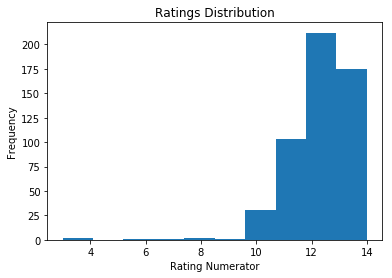

In [79]:
#plot the count of rating numerators between 3 and 14
plt.hist(twitter_clean['rating_numerator'], range = (3, 14));
plt.xlabel('Rating Numerator')
plt.ylabel('Frequency')
plt.title('Ratings Distribution')

##### The plot shows, that the graph is left skewed with a peak at 12.

In [80]:
twitter_clean.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,5.280000e+02,528.000000,528.000000,528.000000,528.000000,528.000000,5.280000e+02,528.000000,528.000000
mean,8.202600e+17,12.004773,9.994318,1.340909,0.634526,0.138655,5.883834e-02,4536.215909,17303.909091
std,3.812947e+16,1.263886,0.130558,0.727133,0.256504,0.104174,5.317652e-02,4938.216146,13763.060333
min,7.588547e+17,3.000000,7.000000,1.000000,0.082489,0.000023,5.595040e-07,462.000000,2840.000000
25%,7.877873e+17,11.000000,10.000000,1.000000,0.421555,0.051587,1.199225e-02,2154.750000,8962.250000
50%,8.183980e+17,12.000000,10.000000,1.000000,0.656365,0.122895,4.496115e-02,3260.500000,13345.000000
75%,8.491420e+17,13.000000,10.000000,1.000000,0.875060,0.199749,9.411573e-02,5047.250000,21529.500000
max,8.924206e+17,24.000000,10.000000,4.000000,0.999953,0.467678,2.476190e-01,59956.000000,125050.000000


##### Let's Observe the tweet with maximum number of likes (favorite_count) and retweets (retweet_count).

In [81]:
#highest rated dog
twitter_clean['rating_numerator'].value_counts()

12.00    212
13.00    157
11.00    102
10.00     29
14.00     17
8.00       2
11.27      1
7.00       1
4.00       1
9.00       1
3.00       1
9.75       1
24.00      1
6.00       1
13.50      1
Name: rating_numerator, dtype: int64

In [82]:
#check highest rated dog
twitter_clean[twitter_clean.rating_numerator == 24]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,display_text_range
304,810984652412424192,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24.0,7.0,Sam,,,...,True,Tibetan Mastiff,0.036708,True,Labrador Retriever,0.025823,True,1548,5614,"[0, 143]"


##### we can see that The highest rated dog is Sam.


In [83]:
#check the lowest rated dog
twitter_clean[twitter_clean.rating_numerator == 3]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,display_text_range
440,777885040357281792,2016-09-19 15:00:20,"<a href=""http://twitter.com/download/iphone"" r...",This is Wesley. He's clearly trespassing. Seem...,https://twitter.com/dog_rates/status/777885040...,3.0,10.0,Wesley,,,...,True,Basset,0.119682,True,Siberian Husky,0.108709,True,1758,6665,"[0, 116]"


##### We can see that the lowest rated dog is Wesley.

In [84]:
twitter_clean[twitter_clean.favorite_count == twitter_clean.favorite_count.max()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,display_text_range
315,807106840509214720,2016-12-09 06:17:20,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13.0,10.0,Stephan,,,...,True,Pomeranian,0.120358,True,Toy Terrier,0.077008,True,59956,125050,"[0, 61]"


In [85]:
twitter_clean[twitter_clean.retweet_count == twitter_clean.retweet_count.max()]


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,display_text_range
315,807106840509214720,2016-12-09 06:17:20,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13.0,10.0,Stephan,,,...,True,Pomeranian,0.120358,True,Toy Terrier,0.077008,True,59956,125050,"[0, 61]"


##### Most liked and Most favorite was the same dog named Stephan.


Text(0, 0.5, 'Likes')

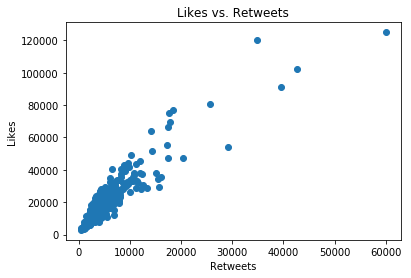

In [86]:

#create scatter plot between retweets and favorites
plt.scatter(twitter_clean['retweet_count'], twitter_clean['favorite_count']);
plt.title('Likes vs. Retweets')
plt.xlabel('Retweets')
plt.ylabel('Likes')

##### This graph shows strong positive correlation between retweets and Favorites.